## Problem set 1
In class work for 1/16/2025.

In [52]:
import numpy as np
import matplotlib.pyplot as plt # for plotting

In [2]:
# define some constants (SI units)
hbar = 1.0546e-34 # J s, reduced Planck constant
ec = 1.609e-19 # C, proton charge
m_e = 9.109e-31 # kg, electron mass
g = 2.002 # electron gyromagnetic factor
mu_B = ec*hbar/(2*m_e) # J/T, Bohr magneton
eV = 1.609e-19 # J , electron volt definition

In [3]:
# some other useful definitions
# Spin-1/2 matrices
Sz = hbar/2*np.matrix([[1,0],[0,-1]])
Sx = hbar/2*np.matrix([[0,1],[1,0]])
Sy = hbar/2*(1.0j)*np.matrix([[0,-1],[1,0]])

In [4]:
print(Sx)
print(Sy)
print(Sz)

[[0.000e+00 5.273e-35]
 [5.273e-35 0.000e+00]]
[[0.+0.000e+00j 0.-5.273e-35j]
 [0.+5.273e-35j 0.+0.000e+00j]]
[[ 5.273e-35  0.000e+00]
 [ 0.000e+00 -5.273e-35]]


### Problem 1
An electron is in a magnetic field of $\mathbf{B} = B_1 \hat{x} + B_0 \hat{z}$.
- What is the Hamiltonian for this system?  (See McIntyre Section 3.2) Express this as a matrix in the basis of the $z$ component of spin ($S_z$).
- Suppose the magnetic field has (in SI units) $B_0=50\,\mathrm{mT}, B_1=10\,\mathrm{mT}$.
What are the energy eigenvalues (in units of electron-volts, eV) and eigenstates for this system?  Express the eigenstates as vectors in the $S_z$ basis.
Give all numerical values to 3 significant digits.
- The particle has an initial state of $\ket{+_z}$.  What is the state of the particle as a function of time, $\ket{\psi(t)}$?  (The spin will precess.  Calculate the angular frequency $\omega$ of this precession in units of rad/s.)
- Qualitatively, how does the expectation value of the particle's spin vector vary as a function of time, $\left<\mathbf{S}(t)\right>$?


In [5]:
# First define the magnetic field (using units of T)
Bx = 10e-3 # T
Bz = 50e-3 # T
By = 0.0 # T
B = np.matrix([[Bx,By,Bz]]).T # we make a 1x3 matrix, then take its transpose to get a 3x1 matrix, i.e. column vector.
print(B)

[[0.01]
 [0.  ]
 [0.05]]


From McIntyre Eq. (3.23), the Hamiltonian is
$$
H = \frac{e}{m_e} \vec{S}\cdot\vec{B}
$$

In [7]:
# The Hamiltonian
# From McIntyre Eq. (3.23)
H = ec/m_e*(Sx*Bx + Sz*Bz ) #+ Sy*By ) # keeping it real
print(H)

[[ 4.65707377e-25  9.31414755e-26]
 [ 9.31414755e-26 -4.65707377e-25]]


In [18]:
# eig
E=np.linalg.eigvals(H)
print(E) # J
print(E/eV ) # eV

[ 4.74930201e-25 -4.74930201e-25]
[ 2.95171038e-06 -2.95171038e-06]


In [36]:
# calculate the Larmor frequency
omega = np.abs(E[0]-E[1])/hbar
print(omega) # rad/s

9006831043.33164


In [13]:
ER = np.linalg.eig(H)

In [19]:
EV0 = ER.eigenvectors[:,0]
EV1 = ER.eigenvectors[:,1]
print(ER.eigenvectors)
print(EV0)
print(EV1)

[[ 0.99513333 -0.09853762]
 [ 0.09853762  0.99513333]]
[[0.99513333]
 [0.09853762]]
[[-0.09853762]
 [ 0.99513333]]


In [21]:
# initial state
psi0 = np.matrix([[1,0]]).T # column vector
print(psi0)

[[1]
 [0]]


Solution outline:

- Express psi0 in terms of the eigenvectors of H
$$
\left| \psi_0 \right> = c_0 \left| \xi_0 \right> + c_1 \left| \xi_1\right>
$$

$$
c_0 = \left< \xi_0 \middle| \psi_0 \right> = \vec{\xi}_0^\dagger \cdot \vec{\psi}_0,
\qquad
c_1 = \left< \xi_1 \middle| \psi_0 \right>,
$$

In [24]:
c0 = (EV0.H * psi0)[0,0] # pick out the 0,0 (only) element of the matrix
print(c0)

0.9951333266680702


In [25]:
c1 = (EV1.H * psi0)[0,0]
print(c1)

-0.09853761796664223


In [26]:
np.abs(c0)**2 + np.abs(c1)**2 # should equal 1

1.0

In [27]:
c0*EV0 + c1*EV1 # Should equal psi0

matrix([[1.],
        [0.]])

$$
\left| \psi(t)\right> = \sum\limits_n c_n \exp(-i E_n t/\hbar) \left| \xi_n \right>
$$

In [29]:
def psi(t): # McIntyre Eq. (3.11)
  return c0*EV0*np.exp(-(1.0j)*E[0]*t/hbar) + c1*EV1*np.exp(-(1.0j)*E[1]*t/hbar)

In [30]:
psi(0.0)

matrix([[1.+0.j],
        [0.+0.j]])

Let's calculate some expectation values...

$$
\langle S_z \rangle = \left< \psi \middle| S_z \middle| \psi \right> = \vec{\psi}^\dagger S_z \vec{\psi}
$$

In [40]:
# expectation value of Sz
def EV_Sz(t):
  return np.real(psi(t).H * Sz * psi(t))[0,0]

In [54]:
# expectation value of H
def EV_H(t):
  return np.real(psi(t).H * H * psi(t))[0,0]

In [41]:
EV_Sz(1.0e-10)

5.19615104028712e-35

In [55]:
# evaluate EV_Sz over a set of times
t_list = np.linspace(0.0,1e-9,200)
Sz_list = np.array([EV_Sz(t) for t in t_list])
H_list = np.array([EV_H(t) for t in t_list])

In [51]:
print(t_list[0:5])
print(Sz_list[0:5])

[0.00000000e+00 5.02512563e-12 1.00502513e-11 1.50753769e-11
 2.01005025e-11]
[5.27300000e-35 5.27279231e-35 5.27216966e-35 5.27113333e-35
 5.26968544e-35]


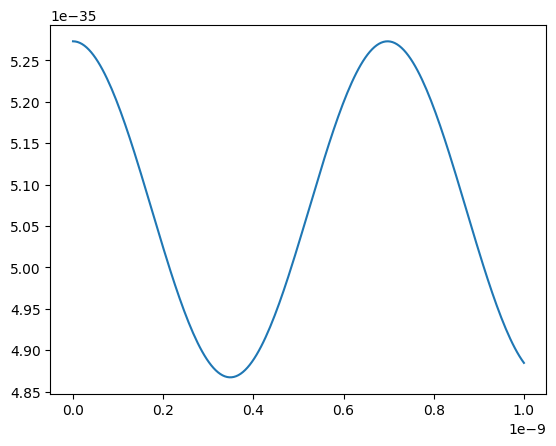

In [53]:
plt.plot(t_list,Sz_list)

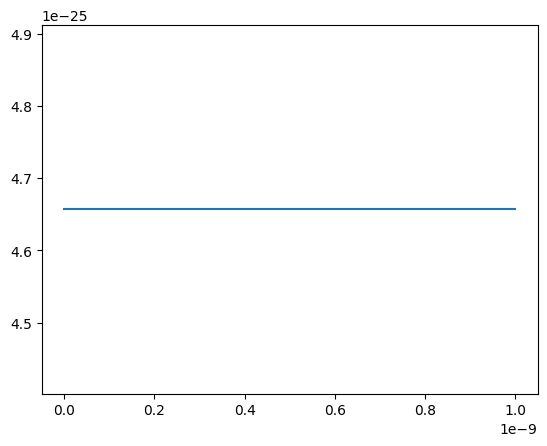

In [56]:
plt.plot(t_list,H_list)

### Bonus, time permitting
Let's redo this problem using a set of "natural units" to make the numerical values closet to one. (This helps avoid rounding errors in numerical calculations.)
Generally, we would pick some combination of constants to find typical values of length, mass, and time, and use those to define a new set of units within which to work the problem.

In this case, there is already a standard choice of natural units, called "atomic units" or "Hartree units".  The units are chosen to force the following:
$$
\begin{aligned}
e &= 1 &&\text{elementary charge} \\
m_e &=1 &&\text{electron mass} \\
\hbar &=1 &&\text{reduced Planck constant} \\
k_e = \frac{1}{4\pi\epsilon_0}&=1 &&\text{Coulomb force constant}
\end{aligned}
$$

With this choice, we get the following new units for length and time (the mass unit is the electron mass, above):
$$
\begin{aligned}
m_e &= 9.109\times 10^{-31}\,\mathrm{kg} && \text{electron mass}\\
a_0 =  &= 5.292\times 10^{-11}\,\mathrm{m} && \text{Bohr radius of the H atom} \\
t_0 &= 2.419\times 10^{-17}\,\mathrm{s} && \text{1/Hartree frequency}.
\end{aligned}
$$

Let's rework the problem using these new units.  What do you notice about the numerical values?

## Problem 2
A particle with mass $m$ is in an infinite square well of width $L$, with its lower edge at $x=0$.
- What is the Hamiltonian operator for this system?  Express it in the position representation.

The particle is in the initial state
$\psi(x,0) = C \sin^3 (\pi x/L)$ for the interval $0<x<L$ and zero elsewhere.

- Find the normalization constant $C$ and express $\psi(x,0)$ in terms of the eigenstates.  (Hint: there are at least two ways to do this: integrating directly or by expressing the initial wavefunction as a superposition of eigenstates.  See if you can do both.)
- What is the wavefunction at a later time $\psi(x,t)$?
